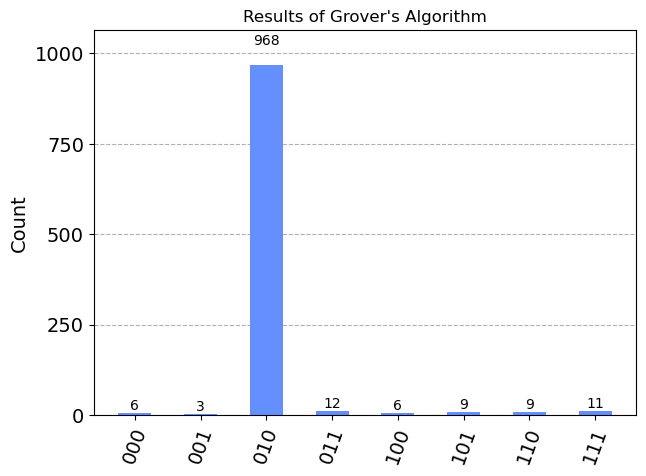

In [17]:
#jonathan ayotte v00951171
import math
import warnings
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZGate, XGate, HGate
from qiskit.visualization import plot_histogram
from qiskit import Aer, transpile, execute


warnings.filterwarnings("ignore")

def grover_oracle(target_state):
    """Build a Grover oracle for a single marked state

    Parameters:
        target_state (str): Marked state of oracle

    Returns:
        QuantumCircuit: Quantum circuit representing Grover oracle
    """
    num_qubits = len(target_state)
    qc = QuantumCircuit(num_qubits)

    # Flip qubits for '0's in the target state
    for qubit, state in enumerate(target_state[::-1]):
        if state == '0':
            qc.x(qubit)

    # Apply controlled-Z (multi-controlled-Z for 3 qubits and an X on the last qubit)
    qc.h(num_qubits - 1)
    qc.mct(list(range(num_qubits - 1)), num_qubits - 1)  # MCT to the last qubit
    qc.h(num_qubits - 1)

    # Flip the qubits back
    for qubit, state in enumerate(target_state[::-1]):
        if state == '0':
            qc.x(qubit)

    return qc

def grover_diffuser(num_qubits):
    """Creates the diffuser for n qubits."""
    qc = QuantumCircuit(num_qubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    qc.h(range(num_qubits))
    # Apply transformation |00..0> -> |11..1> (X-gates)
    qc.x(range(num_qubits))
    # Do multi-controlled-Z gate
    qc.h(num_qubits - 1)
    qc.mct(list(range(num_qubits - 1)), num_qubits - 1)
    qc.h(num_qubits - 1)
    # Apply transformation |11..1> -> |00..0>
    qc.x(range(num_qubits))
    # Apply transformation |00..0> -> |s>
    qc.h(range(num_qubits))
    return qc

# Define the target state
target_state = "010"

# Create the oracle circuit for the target state
oracle = grover_oracle(target_state)

# Create the diffuser circuit
diffuser = grover_diffuser(3)

# Calculate the optimal number of iterations
optimal_iterations = round(math.pi / 4 * math.sqrt(2**3))

# Create the initial state and apply Grover's algorithm
qc = QuantumCircuit(3, 3)
qc.h(range(3))  # Initialize in superposition

# Apply Grover's algorithm: Oracle + Diffuser
for _ in range(optimal_iterations):
    qc.compose(oracle, inplace=True)
    qc.compose(diffuser, inplace=True)

# Measurement
qc.measure(range(3), range(3))

# Use Aer's qasm_simulator
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)
job = execute(transpiled_qc, backend, shots=1024)
result = job.result()

# Plot the results
plot_histogram(result.get_counts(), title="Results of Grover's Algorithm")

In [18]:

# Part (b): Difference between Phase Oracle and Boolean Oracle
# Phase Oracle: In Grover's algorithm, a phase oracle marks the target state by applying a phase shift of 
#  −1 to it, leaving other states unchanged. This is achieved by flipping the sign of the target state's amplitude. 
# It is often implemented using a controlled-Z gate or a phase gate.

# # Boolean Oracle: A Boolean oracle, on the other hand, marks the target state by flipping its phase, similar to a phase oracle.
# However, it also flips the phases of states orthogonal to the target state to ensure constructive interference during amplitude 
# amplification. In terms of implementation, a Boolean oracle typically involves applying X gates to the qubits representing 
# '1' in the target state, applying a multi-controlled Z gate (or equivalent), and then reapplying the 
# X gates to revert the qubits back to their original state.
